In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
random.seed(42069)

In [2]:

data = pd.read_csv('quiz.csv', names=['input', 'output'])
data['output'] = data['output'].str.strip()

In [3]:
BASE_ALPHABET = list("0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ")
random.shuffle(BASE_ALPHABET)
BASE_ALPHABET = ''.join(BASE_ALPHABET)

In [11]:
class CipherGeneration:
    def __init__(self, alphabet=BASE_ALPHABET, data=None) -> None:
        self.alphabet = alphabet
        self.data = data

    def decode(self, string=''):
        base = len(self.alphabet)
        strlen = len(string)
        num = 0

        for i, char in enumerate(string):
            power = strlen - (i + 1)
            num += self.alphabet.index(char) * (base ** power)

        return num

    def get_mutation(self):
        new = CipherGeneration(self.alphabet, self.data)

        alphabet_list = list(new.alphabet)
        char1 = random.choice(range(len(new.alphabet)))
        char2 = random.choice(range(len(new.alphabet)))

        alphabet_list[char1], alphabet_list[char2] =  alphabet_list[char2], alphabet_list[char1]
        new.alphabet = ''.join(alphabet_list)
        
        return new

    def score(self):
        transformed_data = self.data['output'].apply(self.decode)
        score = ((self.data['input'] - transformed_data) ** 2).sum()

        return -score


class Runner:
    def __init__(self, organism) -> None:
        self.original = organism
        self.best_mutation = None
        self.best_score = 0
        self.generations = []
        
    def search(self, n: int, m: int) -> None:
        current_generation = self.original.get_mutation()
        self.generations.append(current_generation)

        for _ in range(m):
            mutations = [current_generation.get_mutation() for _ in range(n)]
            scores = [mutation.score() for mutation in mutations]
            best_mutation = mutations[scores.index(max(scores))]
            best_score = best_mutation.score()
            self.generations.append(best_mutation)

            if best_score > self.best_score:
                self.best_mutation = best_mutation
                self.best_score = best_score

            if best_score == 0:
                break

            current_generation = best_mutation
                
    def plot_scores(self, save_path=''):
        gen_scores = [gen.score() for gen in self.generations]
        plt.scatter(range(len(gen_scores)), gen_scores)
        plt.ylabel('Score (Higher Better)')
        plt.xlabel('Generation')

0
C7xicPMGvzAZyTNodmwnV5D3B6H0Oup8E21W9sqLQX4YjSeUhIRJgafFtrKlbk


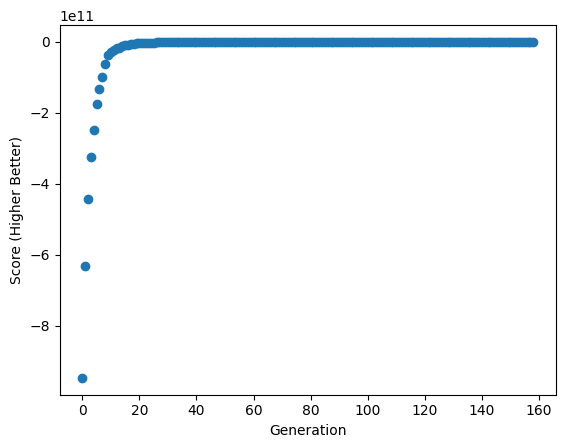

In [13]:
runner = Runner(CipherGeneration(data=data))
runner.search(300, 500)

print(runner.generations[-1].score())
print(runner.generations[-1].alphabet)
runner.plot_scores()

In [14]:
alphabet = runner.generations[-1].alphabet


def encode(num):
    if num == 0:
        return alphabet[0]
    arr = []

    base = len(alphabet)
    while num:
        num, rem = divmod(num, base)
        arr.append(alphabet[rem])
    arr.reverse()
    return ''.join(arr)

print(encode(16465), 'cmW')
print(encode(16465), 'cmW')
print(encode(17941), 'cX3')
print(encode(17942), 'cXB')
print(encode(18898), 'ctR')

cmW cmW
cmW cmW
cX3 cX3
cXB cXB
ctR ctR


In [15]:
print('30001', encode(30001))
print('55555', encode(55555))
print('77788', encode(77788))


30001 GIF
55555 NOi
77788 VNQ
